<a href="https://colab.research.google.com/github/Shoaibpt21/Spam-SMS-Detection/blob/main/SpamSMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
782,ham,Beerage?,NaN,NaN,NaN
3801,ham,No da. I am happy that we sit together na,NaN,NaN,NaN
5508,ham,"Machan you go to gym tomorrow, i wil come lat...",NaN,NaN,NaN
2709,ham,Sorry de i went to shop.,NaN,NaN,NaN
3033,ham,Get ready for &lt;#&gt; inches of pleasure...,NaN,NaN,NaN
4350,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN
2358,ham,I'll talk to the others and probably just come...,NaN,NaN,NaN
3462,ham,i am seeking a lady in the street and a freak ...,NaN,NaN,NaN
2923,ham,Thts god's gift for birds as humans hav some n...,NaN,NaN,NaN
4566,ham,But you were together so you should be thinkin...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


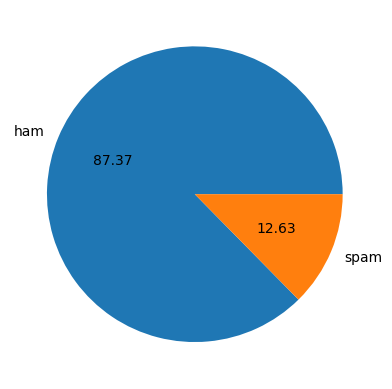

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_char'] = df['text'].apply(len)

In [ ]:
df['num_char']

,num_char
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.tail()

,target,text,num_char
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

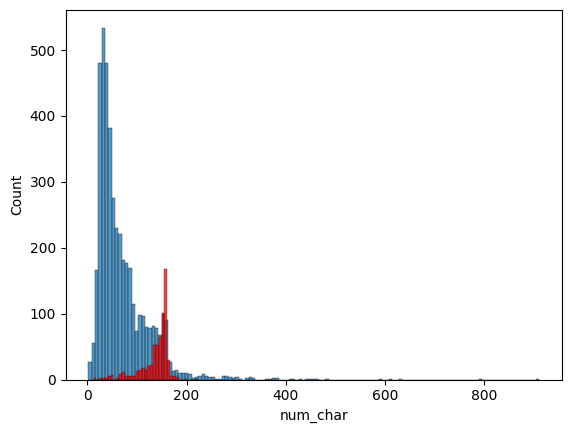

In [ ]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

Number of characters in spam is greater then ham, also similar for number of words.:


<Axes: xlabel='num_words', ylabel='Count'>

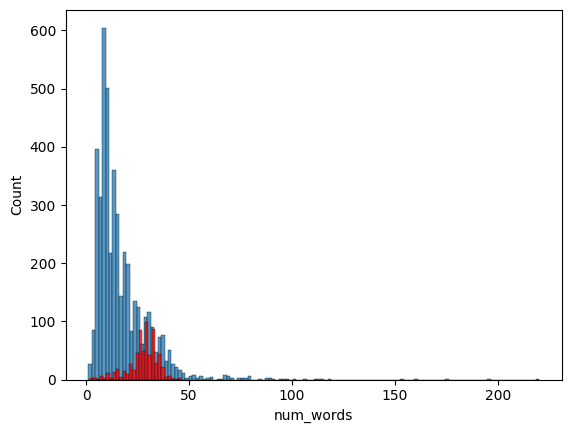

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

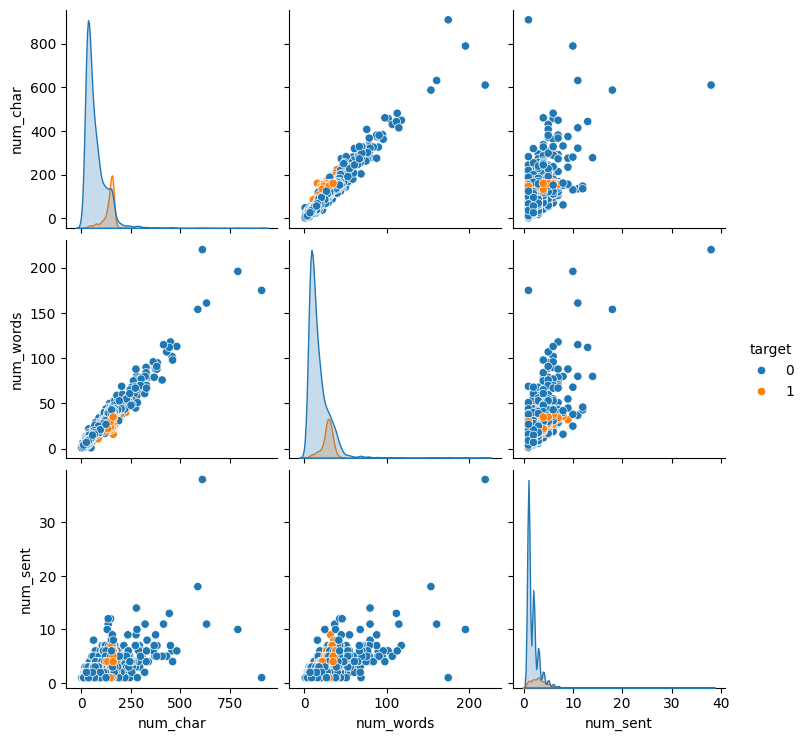

In [ ]:
sns.pairplot(df, hue='target')

<Axes: >

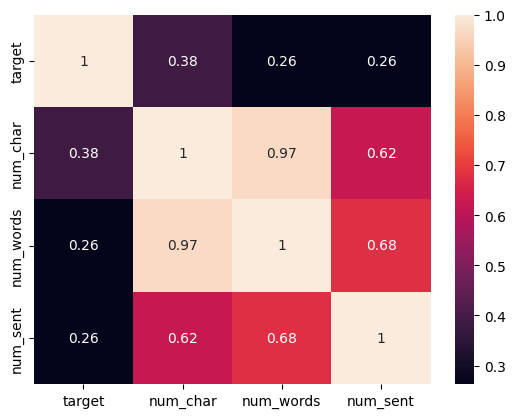

In [ ]:
sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english'):
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['transform_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=' '))

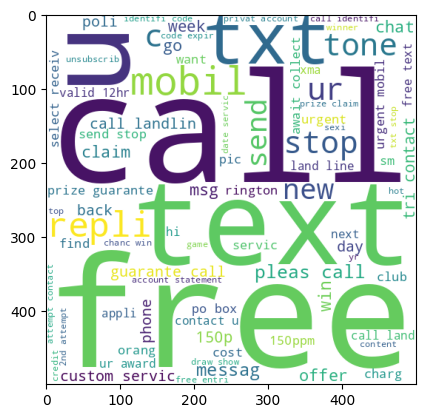

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=' '))
spam_wc = plt.imshow(spam_wc)

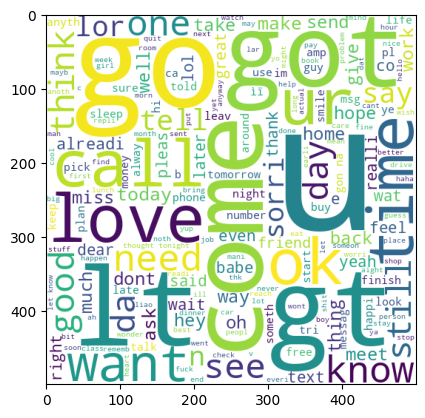

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=' '))
ham_wc = plt.imshow(ham_wc)

In [ ]:
df[df['target'] == 1]

,target,text,num_char,num_words,num_sent,transform_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(40))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


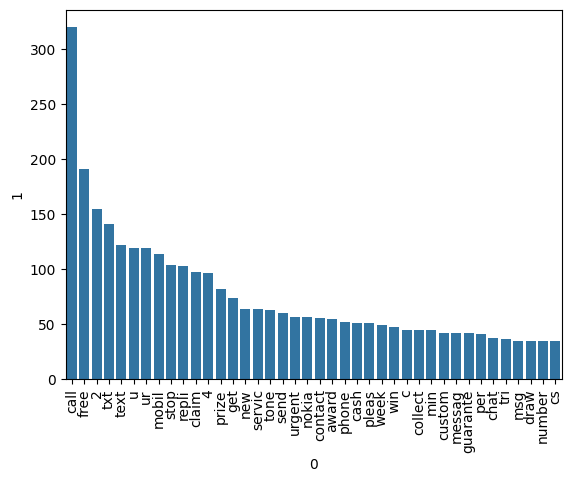

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv = CountVectorizer()
tfidf = TfidfTransformer(smooth_idf=False)

In [ ]:
x = tfidf.fit_transform(x).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]


In [ ]:
print(precision_score(y_test, y_pred1))

0.5315315315315315


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [ ]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.971953578336557, 0.9811320754716981)

In [ ]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.971953578336557
SVC precision is 0.9811320754716981
KN accuracy is 0.8916827852998066
KN precision is 1.0
NB accuracy is 0.9555125725338491
NB precision is 1.0
DT accuracy is 0.9264990328820116
DT precision is 0.7310924369747899
LR accuracy is 0.9497098646034816
LR precision is 0.9647058823529412
RF accuracy is 0.9709864603481625
RF precision is 1.0
AdaBoost accuracy is 0.9197292069632496
AdaBoost precision is 0.7608695652173914
BgC accuracy is 0.9535783365570599
BgC precision is 0.8267716535433071
ETC accuracy is 0.9729206963249516
ETC precision is 0.963963963963964
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.8921568627450981


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.891683,1.000000
2,NB,0.955513,1.000000
5,RF,0.970986,1.000000
0,SVC,0.971954,0.981132
4,LR,0.949710,0.964706
8,ETC,0.972921,0.963964
9,GBDT,0.950677,0.892157
7,BgC,0.953578,0.826772
6,AdaBoost,0.919729,0.760870
3,DT,0.926499,0.731092


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Shapes:", x.shape, getattr(y,'shape', None))


unique, counts = np.unique(y, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))

if isinstance(x, pd.DataFrame):
    for col in x.columns:
        if np.array_equal(x[col].values, np.asarray(y).reshape(-1,)):
            print(f"WARNING: column '{col}' equals the target vector exactly — drop it!")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y if len(unique)>1 else None)
most_common = Counter(y_train).most_common(1)[0][0]
baseline_acc = np.mean(y_test == most_common)
print("Majority-class baseline accuracy:", baseline_acc)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier()
bag = BaggingClassifier()

knn.fit(X_train, y_train)
bag.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
pred_bag = bag.predict(X_test)

print("Acc KNN:", accuracy_score(y_test, pred_knn))
print("Acc Bagging:", accuracy_score(y_test, pred_bag))
print("Are predictions identical across models?:", np.array_equal(pred_knn, pred_bag))
print("Prediction agreement (fraction equal):", np.mean(pred_knn == pred_bag))

print("Unique preds KNN:", np.unique(pred_knn, return_counts=True))
print("Unique preds Bagging:", np.unique(pred_bag, return_counts=True))

print("KNN report:\n", classification_report(y_test, pred_knn, zero_division=0))
print("Bagging report:\n", classification_report(y_test, pred_bag, zero_division=0))
print("Confusion matrix KNN:\n", confusion_matrix(y_test, pred_knn))

Shapes: (5169, 6708) (5169,)
Label distribution: {np.int64(0): np.int64(4516), np.int64(1): np.int64(653)}
Majority-class baseline accuracy: 0.8733075435203095
Acc KNN: 0.8916827852998066
Acc Bagging: 0.9487427466150871
Are predictions identical across models?: False
Prediction agreement (fraction equal): 0.8945841392649904
Unique preds KNN: (array([0, 1]), array([1015,   19]))
Unique preds Bagging: (array([0, 1]), array([908, 126]))
KNN report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       903
           1       1.00      0.15      0.25       131

    accuracy                           0.89      1034
   macro avg       0.94      0.57      0.60      1034
weighted avg       0.90      0.89      0.85      1034

Bagging report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       903
           1       0.81      0.78      0.79       131

    accuracy                           0.

In [ ]:
assert len(y_test) == len(pred_knn)
print("NaNs in X:", np.isnan(x).sum() if isinstance(x, np.ndarray) else x.isna().sum().sum())
print("NaNs in y:", np.isnan(y).sum() if isinstance(y, np.ndarray) else pd.Series(y).isna().sum())
if hasattr(knn, "predict_proba"):
    probs = knn.predict_proba(X_test)
    print("Probs shape:", probs.shape, "Example probs[0]:", probs[0])

NaNs in X: 0
NaNs in y: 0
Probs shape: (1034, 2) Example probs[0]: [1. 0.]


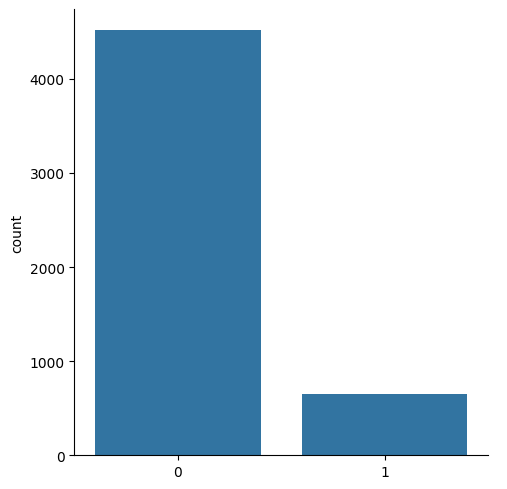

In [ ]:
sns.catplot(x=y, kind='count')

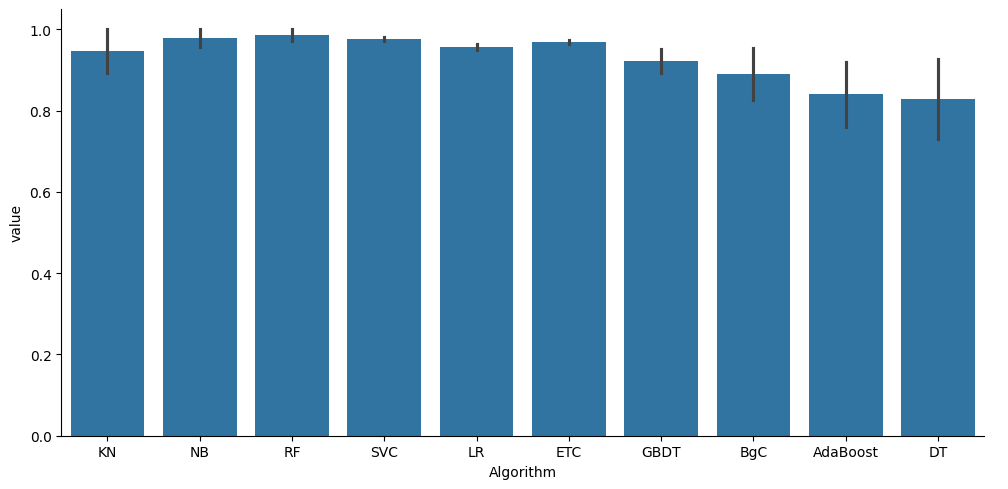

In [ ]:
sns.catplot(x = 'Algorithm', y = 'value', data=performance_df.melt(id_vars='Algorithm'), kind='bar', height=5, aspect=2)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('KNN', knn), ('Bagging', bag)], voting='hard')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('Bagging', BaggingClassifier())])

In [ ]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8907156673114119
[[903   0]
 [113  18]]
1.0


In [ ]:
estimators = []
model1 = KNeighborsClassifier(n_neighbors=1)
estimators.append(('KNN', model1))
model2 = BaggingClassifier(n_estimators=50, random_state=2)

In [ ]:
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9245647969052224
[[903   0]
 [ 78  53]]
1.0


## Final Summary of Model Predictions

Based on the performance metrics calculated earlier, here is a summary of the models and their performance:

| Algorithm | Accuracy | Precision |
|---|---|---|
| KN | 0.891683 | 1.000000 |
| NB | 0.955513 | 1.000000 |
| RF | 0.970986 | 1.000000 |
| SVC | 0.971954 | 0.981132 |
| LR | 0.949710 | 0.964706 |
| ETC | 0.972921 | 0.963964 |
| GBDT | 0.950677 | 0.892157 |
| BgC | 0.953578 | 0.826772 |
| AdaBoost | 0.919729 | 0.760870 |
| DT | 0.926499 | 0.731092 |

Models with a precision of 1.0 (KN, NB, RF) are excellent at identifying spam without incorrectly flagging legitimate messages as spam. The SVC, LR, and ETC models also show high precision. The choice of the best model might depend on the specific requirements, considering both accuracy and precision.